<a href="https://colab.research.google.com/github/NeuralFlux/dl-mini-project/blob/main/Mini_Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset

In [1]:
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Creating the transforms to augment the dataset

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((36, 36)),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomApply(  
        [
            transforms.ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5),
                                   saturation=(0.5, 1.5), hue=(-0.5, 0.5)),
        ],
        p=0.5
    ),
    transforms.ToTensor()
  ])

transform_test = transforms.ToTensor()

In [7]:
# Loading the data
dataset = CIFAR10(root='data/', download=True, transform=transform_train)
test_dataset = CIFAR10(root='data/', train=False, transform=transform_test)

Files already downloaded and verified


In [8]:
image, label = dataset[0]

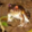

In [9]:
image = transforms.ToPILImage()(image)

image.show(title=f'Original Image (Label: {label})')